In [1]:
import pandas as pd

mat = pd.read_csv("train-student-mat.csv")

por = pd.read_csv("train-student-por.csv")

In [2]:
#과목별 평균을 기준으로 새로운 G1_X 열 만들기
por['G1_X'] = por['G1'] - por['G1'].mean()
mat['G1_X'] = mat['G1'] - mat['G1'].mean()


#열 이름 변경
#por.rename(columns={'G1': 'G1_por'}, inplace=True)
#mat.rename(columns={'G1': 'G1_mat'}, inplace=True)

#데이터 합치기
df = pd.concat([por, mat])

In [3]:
df['address'].unique()

array(['U', 'R'], dtype=object)

In [4]:
#df1 = df[df['address']=='R']

df1 = df

In [56]:
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G1_X
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,-11.399076
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,-2.399076
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,0.600924
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,2.600924
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,-0.399076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,-1.908861
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,3.091139
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,-0.908861
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,0.091139


In [55]:
df1[['G1', 'G1_X']].head(4)

,G1,G1_X
0,0,-11.399076
1,9,-2.399076
2,12,0.600924
3,14,2.600924


In [74]:
g1X = df1[['Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'traveltime', 'studytime',
       'failures','famrel','freetime', 'goout',
       'health', 'absences', 'address']]


g1y = df1['G1_X']

In [75]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 각 열에 대해 라벨 인코딩을 수행합니다.
for col in g1X.columns:
    if g1X[col].dtype == 'object':  # 문자열 형식인 열만 처리합니다.
        g1X[col] = label_encoder.fit_transform(g1X[col])

C:\Users\user\AppData\Local\Temp\ipykernel_22448\3706108745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1X[col] = label_encoder.fit_transform(g1X[col])
C:\Users\user\AppData\Local\Temp\ipykernel_22448\3706108745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1X[col] = label_encoder.fit_transform(g1X[col])
C:\Users\user\AppData\Local\Temp\ipykernel_22448\3706108745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [76]:
columns = g1X.columns

for col in columns:
    print(col, g1X[col].unique())

Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob [0 1 2 3 4]
Fjob [4 2 3 1 0]
reason [0 2 1 3]
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 1 2]
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
health [3 5 1 2 4]
absences [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3
 25 54 20 56 28 75 19 38 40 23 17]
address [1 0]


In [77]:
# 데이터 분할하기
# Train, Test 데이터 분리
from sklearn.model_selection import train_test_split

g1X_train, g1X_test, g1y_train, g1y_test = train_test_split(g1X, g1y, test_size=0.2, random_state=42)


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 선형 회귀 모델을 초기화하고 훈련합니다.
model = LinearRegression()
model.fit(g1X_train, g1y_train)

# 테스트 세트를 사용하여 예측을 수행합니다.
y_pred = model.predict(g1X_test)


# 예측 결과를 평가
mse = mean_squared_error(g1y_test, y_pred)
print("LinearRegression 평균제곱오차 MSE:", mse)


LinearRegression 평균제곱오차 MSE: 6.91767357586546


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


# Random Forest 회귀 모델 생성
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 훈련
model_rf.fit(g1X_train, g1y_train)

# 테스트 데이터로 예측
y_pred_rf = model_rf.predict(g1X_test)

# 평가: 평균 제곱 오차(MSE)
mse_rf = mean_squared_error(g1y_test, y_pred_rf)
print("Random Forest 모델의 평균 제곱 오차(MSE):", mse_rf)




Random Forest 모델의 평균 제곱 오차(MSE): 5.89914141316392


In [80]:
from lightgbm import LGBMRegressor

# 모델 재훈련
lg_model = LGBMRegressor(random_state=0, verbose=-1)
lg_model.fit(g1X_train, g1y_train)

# 재예측
lg_y_pred = lg_model.predict(g1X_test)

# 평가: 평균 제곱 오차(MSE)
mse_lg = mean_squared_error(g1y_test, lg_y_pred)

print("LightGBM 모델의 평균 제곱 오차(MSE):", mse_lg)

LightGBM 모델의 평균 제곱 오차(MSE): 6.345831730202913


In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE


# 정규화
scaler = StandardScaler()

mm_X_train = scaler.fit_transform(g1X_train)
mm_X_test = scaler.transform(g1X_test)

# 모델 재훈련
#lgbm
mm_model = LGBMRegressor(random_state=0, verbose=-1)
mm_model.fit(mm_X_train, g1y_train)
# 랜덤포레스트
model_rf.fit(mm_X_train, g1y_train)

#재예측
mm_y_pred = mm_model.predict(mm_X_test)
mrf_y_pred = model_rf.predict(mm_X_test)

#평가: 평균 제곱 오차(MSE)
mse_mm = mean_squared_error(g1y_test, mm_y_pred)
mse_mrf = mean_squared_error(g1y_test, mrf_y_pred)


#MinMaxScaler
n_scaler = MinMaxScaler()

nn_X_train = n_scaler.fit_transform(g1X_train)
nn_X_test = n_scaler.transform(g1X_test)

# 모델 재훈련
nn_model = LGBMRegressor(random_state=0, verbose=-1)
nn_model.fit(nn_X_train, g1y_train)

# 랜덤포레스트
model_rf.fit(nn_X_train, g1y_train)

#재예측
nn_y_pred = nn_model.predict(nn_X_test)
nrf_y_pred = model_rf.predict(nn_X_test)


# 평가: 평균 제곱 오차(MSE)
mse_nn = mean_squared_error(g1y_test, nn_y_pred)
mse_nrf = mean_squared_error(g1y_test, nrf_y_pred)


In [ ]:
print("Standard 후 LightGBM 모델의 평균 제곱 오차(MSE):", mse_mm)
print("MinMax 후 LightGBM 모델의 평균 제곱 오차(MSE):", mse_nn)

print("Standard 후 랜덤포레스트 모델의 평균 제곱 오차(MSE):", mse_mrf)
print("MinMax 후 랜덤포레스트 모델의 평균 제곱 오차(MSE):", mse_nrf)


# RMSE 계산
rmse = mse_mrf ** 0.5
print("평균 제곱근 오차(RMSE):", rmse)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestRegressor()
#model = LGBMRegressor()

# 그리드 서치를 사용하여 모델 최적화
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(mm_X_train, g1y_train)

# 최적 모델 및 하이퍼파라미터 출력
print("최적 모델:", grid_search.best_estimator_)
print("최적 하이퍼파라미터:", grid_search.best_params_)

In [20]:
from sklearn.ensemble import RandomForestRegressor

# 최적의 하이퍼파라미터로 랜덤 포레스트 모델 생성
b_model = grid_search.best_estimator_

# 모델 학습
b_model.fit(mm_X_train, g1y_train)

# 테스트 데이터에 대한 예측 수행
predictions = b_model.predict(mm_X_test)

# 평균 제곱 오차 계산
mse = mean_squared_error(g1y_test, predictions)
print("평균 제곱 오차(MSE):", mse)

평균 제곱 오차(MSE): 5.8929115876468785


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 첫 번째 그리드 서치를 사용하여 초기 하이퍼파라미터 탐색
param_grid_initial = {
    'n_estimators': [310, 330, 350],
    'max_depth': [20, 24, 28],
    'min_samples_split': [9, 11, 13]
}
grid_search_initial = GridSearchCV(model, param_grid_initial, cv=5, scoring='neg_mean_squared_error')
grid_search_initial.fit(mm_X_train, g1y_train)

# 초기 그리드 서치 결과 출력
print("초기 그리드 서치 최적 하이퍼파라미터:", grid_search_initial.best_params_)

# 초기 그리드 서치에서 얻은 최적의 하이퍼파라미터를 기반으로 더 좁은 범위의 하이퍼파라미터 탐색
best_params_initial = grid_search_initial.best_params_
param_grid_finer = {
    'n_estimators': [best_params_initial['n_estimators'] - 20, best_params_initial['n_estimators'], best_params_initial['n_estimators'] + 20],
    #'max_depth': [best_params_initial['max_depth']], 
    'max_depth': [best_params_initial['max_depth'] - 4, best_params_initial['max_depth'], best_params_initial['max_depth'] + 4],
    'min_samples_split': [best_params_initial['min_samples_split'] - 2, best_params_initial['min_samples_split'], best_params_initial['min_samples_split'] + 2]
}
grid_search_finer = GridSearchCV(model, param_grid_finer, cv=5, scoring='neg_mean_squared_error')
grid_search_finer.fit(mm_X_train, g1y_train)

# 두 번째 그리드 서치 결과 출력
print("두 번째 그리드 서치 최적 하이퍼파라미터:", grid_search_finer.best_params_)

ValueError: Invalid parameter 'max_depth' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [16]:
print(grid_search_finer.best_estimator_)

RandomForestRegressor(min_samples_split=8, n_estimators=400)


In [62]:
from sklearn.ensemble import RandomForestRegressor

# 최적의 하이퍼파라미터로 랜덤 포레스트 모델 생성
brf_model = grid_search_finer.best_estimator_

# 모델 학습
brf_model.fit(mm_X_train, g1y_train)

# 테스트 데이터에 대한 예측 수행
predictions = brf_model.predict(mm_X_test)

# 평균 제곱 오차 계산
mse = mean_squared_error(g1y_test, predictions)
print("평균 제곱 오차(MSE):", mse)

# RMSE 계산
rmse = mse ** 0.5
print("평균 제곱근 오차(RMSE):", rmse)

평균 제곱 오차(MSE): 6.017482139839744
평균 제곱근 오차(RMSE): 2.453055674019598


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anacon

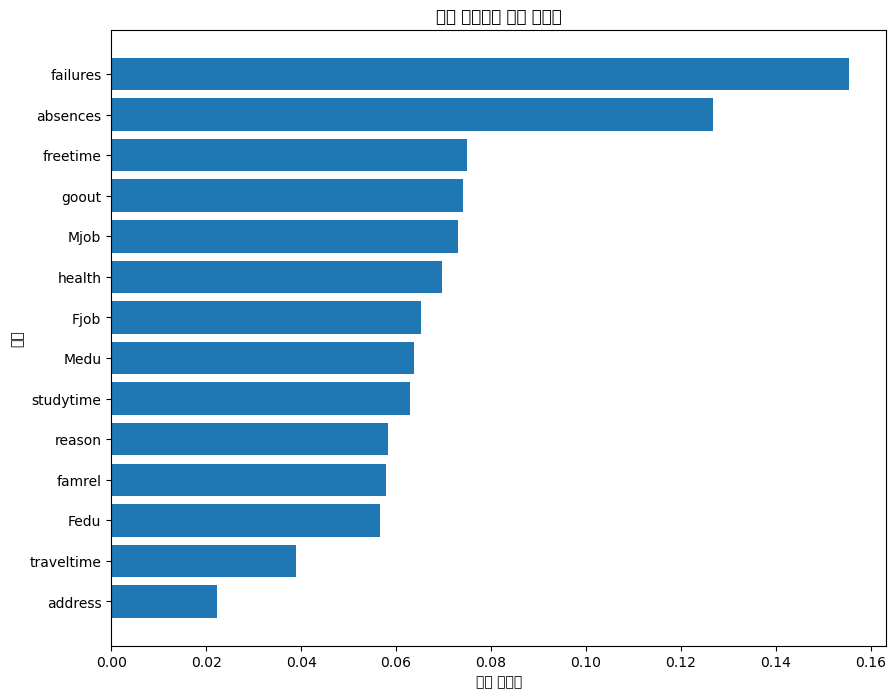

In [18]:
feature_importance = model_rf.feature_importances_
    

import matplotlib.pyplot as plt

# 중요도를 기준으로 특성을 정렬
sorted_idx = feature_importance.argsort()

# 중요도가 높은 특성 순으로 이름과 중요도 추출
sorted_feature_names = g1X.columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# 막대 그래프로 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.title('랜덤 포레스트 특성 중요도')
plt.show()
